# Analyse gem5 results

In [2]:
import gem5_utils as gu
import csv
import json

In [3]:
results_path = "../benchmarks/wkdir/results/"

benchmarks = [
    "fibonacci-go",
    # "fibonacci-nodejs",
    "fibonacci-python",
    "aes-go",
    # "aes-nodejs",
    "aes-python",
    "auth-go",
    "auth-nodejs",
    "auth-python",
]

results = []
for benchmark in benchmarks:
    dir = "{}/{}".format(results_path, benchmark)
    results.append(gu.parse_result(dir,benchmark=benchmark))


In [4]:
gu.to_csv(results_path + '/results.csv', results, [
    ('Benchmark', lambda r: r.props['benchmark']),
    ('Cycles', lambda r: r.stats[0]['system.detailed_cpu1.numCycles']),
    ('Instructions', lambda r: r.stats[0]['system.detailed_cpu1.committedInsts']),
    # ('L2 Miss Rate', lambda r: r.stats[0]['system.l2.overall_miss_rate::total']),
    ('IPC', lambda r: r.stats[0]['system.detailed_cpu1.ipc']),
    ('CPI', lambda r: r.stats[0]['system.detailed_cpu1.cpi']),
])

FileNotFoundError: [Errno 2] No such file or directory: 'results/ipc.pdf'

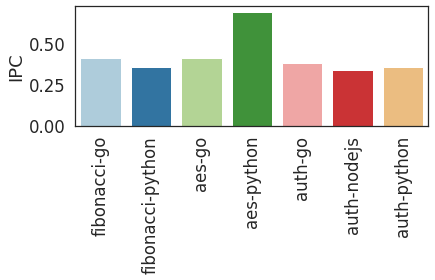

In [7]:

gu.generate_plot(results_path + '/results.csv',
                  'results/ipc.pdf', 'Benchmark', "IPC", None, "IPC")